In [1]:
import numpy as np
import sys
import math
import networkx as nx
from collections import OrderedDict
import matplotlib.pyplot as plt
%matplotlib inline
import statistics as st

In [2]:
Hmean=30
k=32
reads="/panfs/qcb-panasas/rdagnew/HG00514/pbmm_combined/all_3/chr6:160609100-160648600/ccs/reads.fasta"
cov=26

In [3]:
def returnStat(cts):
    summs=[]
    for i in range(4):
        arr=[int(b) for b in cts[i].split(",")]
        arr=np.array(arr)
        m=np.mean(arr)
        med=np.median(arr)
        pas=np.count_nonzero(arr>0)
        summs.append( (m,med,pas) )
    return summs

In [4]:
hgct={}
ilct={}
dup={}
with open('/home/cmb-16/mjc/rdagnew/summerproj/kmer_filter/query_out/chr6:160609100-160648600.out','r') as d:
    for r in d.readlines():
        r=r.rstrip()
        r=r.split()
        idx=r[0]
        if idx in hgct:
            dup[idx]=dup[idx]+1
        else:
            dup[idx]=1
            hgct[idx]=returnStat(r[1:5])
            ilct[idx]=returnStat(r[5:9])

            

In [5]:
dup_list=[dup[r] for r in dup.keys() if dup[r]>1]
full_dup_list=[dup[r] for r in dup.keys() ]

In [6]:
print(len(dup),len(hgct),len(dup_list),max(full_dup_list))

12481 12481 1465 4


(array([1.1016e+04, 1.4550e+03, 9.0000e+00, 1.0000e+00]),
 array([1.  , 1.75, 2.5 , 3.25, 4.  ]),
 <a list of 4 Patch objects>)

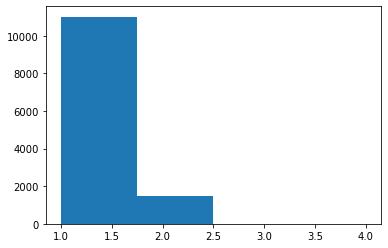

In [7]:
plt.hist(full_dup_list,bins =4)


(array([1.455e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 9.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <a list of 10 Patch objects>)

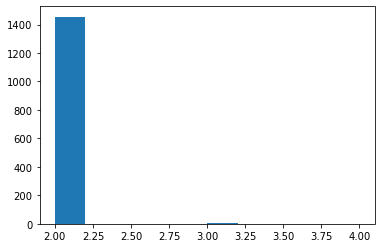

In [8]:
plt.hist(dup_list)

In [111]:
len(dup_list)


1465

In [6]:
hgct['TGAAATAGTTATCTTAGTCATATGTCAAATTGTCATGCAATTCTTCTATTCTTCTTATACCTA']

[(0.0, 0.0, 0), (0.0, 0.0, 0), (1.0, 1.0, 32), (0.0, 0.0, 0)]

In [7]:
ilct['TGAAATAGTTATCTTAGTCATATGTCAAATTGTCATGCAATTCTTCTATTCTTCTTATACCTA']

[(0.0, 0.0, 0), (0.0, 0.0, 0), (69.84375, 69.0, 32), (0.0, 0.0, 0)]

In [8]:
print((len('1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1'.split(","))))

32


In [9]:
print(len('CATTTTTCAGCATTTGTGGATGTGTGTGTGTATTTGTAAGCTTATACATGTTTGAGTGTGTGT'))

63


In [112]:
NucList={'A':'C,G,T','C':'A,G,T','G':'A,C,T','T':'A,C,G'}
kmerList=[]

scale_dist=[]
scale_dist2=[]
scale_dist3=[]
ref_dist=[]
factor=1/Hmean


for key in ilct.keys():
    if dup[key]>1:
        continue
    ref_allele=key[k-1]
    ref,alt,alt2,alt3=hgct[key]
    ill,alti,alt2i,alt3i=ilct[key]
    altList=NucList[ref_allele].split(",")
    if alt[0]==0 and alti[0]>0:
        scale_dist.append(alti[0]*factor)
        scale_dist2.append(alti[1]*factor)
        scale_dist3.append(alti[2])
    if alt2[0]==0 and alt2i[0]>0:
        scale_dist.append(alt2i[0]*factor)
        scale_dist2.append(alt2i[1]*factor)
        scale_dist3.append(alt2i[2])
    if alt3[0]==0 and alt3i[0]>0:
        scale_dist.append(alt3i[0]*factor)
        scale_dist2.append(alt3i[1]*factor)
        scale_dist3.append(alt3i[2])
    ref_dist.append(ref[0])

In [145]:
print(max(scale_dist),st.mean(scale_dist),st.stdev(scale_dist),st.median(scale_dist))
print(max(scale_dist2),st.mean(scale_dist2),st.stdev(scale_dist2),st.median(scale_dist2))
print(max(scale_dist3),st.mean(scale_dist3),st.stdev(scale_dist3),st.median(scale_dist3))
print(max(ref_dist),st.mean(ref_dist),"\n",len(scale_dist))




182.59375 4.095338983050847 17.734095741795798 0.375
182.83333333333331 4.021186440677966 18.639900237049673 0.0
32 11.155367231638419 10.525977134288754 7.0
10969.875 52.35558789488017 
 708


(array([73., 12.,  6.,  7.,  9., 15.,  6.,  7.,  7.,  3.,  4.,  3.,  1.,
         0.,  2.,  1.,  1.,  2.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19]),
 <a list of 18 Patch objects>)

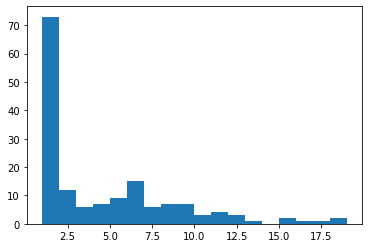

In [114]:
#100x
plt.hist(scale_dist,bins=range(1,20,1 ),cumulative=False ) 


(array([105.,  19.,  24.,   9.,   6.,   2.,   0.,   3.,   0.]),
 array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28]),
 <a list of 9 Patch objects>)

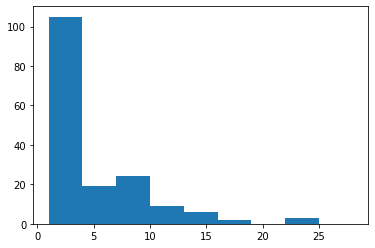

In [115]:
plt.hist(scale_dist2,bins=range(1,30,3 ),cumulative=False ) 

In [ ]:
plt.hist(ref_dist,bins=range(1,70,5 ) ) 

(array([  0., 112.,  71.,  48.,  45.,  38.,  26.,  27.,  30.,  12.,  20.,
         19.,  19.,  11.,  17.,  13.,  11.,  13.,  10.,  11.,   7.,   7.,
          8.,   8.,   6.,   6.,   9.,   4.,   5.,   4.,   4.,   5.,  82.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 33 Patch objects>)

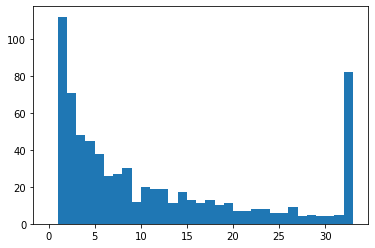

In [116]:
plt.hist(scale_dist3,bins=range(0,34,1 ) ) 

In [9]:
NucList={'A':'C,G,T','C':'A,G,T','G':'A,C,T','T':'A,C,G'}
kmerList=[]
thr=8*Hmean
lthr=0.25*Hmean
dt=10 #2*stdev of mean-median
cthr=3
for key in ilct.keys():
    if dup[key]>1:
        continue
    ref_allele=key[k-1]
    ref,alt,alt2,alt3=hgct[key]
    ill,alti,alt2i,alt3i=ilct[key]
    altList=NucList[ref_allele].split(",")
    if ( alt[0]==0 and alti[0]>0) and (alti[0]<thr and alti[0]>lthr) and (abs(alti[0]-alti[1]) < dt and alti[2]>cthr):
        kmerList.append(key[:k-1] +altList[0] + key[k:])
    if ( alt2[0]==0 and alt2i[0]>0) and (alt2i[0]<thr and alt2i[0]>lthr) and (abs(alt2i[0]-alt2i[1]) < dt and alt2i[2]>cthr):
        kmerList.append(key[:k-1] +altList[1] + key[k:])
    if ( alt3[0]==0 and alt3i[0]>0) and (alt3i[0]<thr and alt3i[0]>lthr) and (abs(alt3i[0]-alt3i[1]) < dt and alt3i[2]>cthr):
        kmerList.append(key[:k-1] +altList[2] + key[k:])
   

In [10]:
print(ill[0])

43.96875


In [11]:
print(len(kmerList),len(set(kmerList)))

71 71


In [12]:
print(len(kmerList[0]),len(kmerList[-1]))

63 63


In [13]:
def storePSVfilt(PSV,PSVlist,MG,k):
    l=0
    for kmers in PSVlist:
        n = kmers.split()
        PSV[kmers] = []
        kmer = ""
        
 
        if kmers not in node_multi.keys():
            node_multi[kmers]=1
        else:
            node_multi[kmers] = node_multi[kmers] + 1
        MG.add_node(kmers ,ref=kmers[k-1], t=2, mult = node_multi[kmers] )

        for i in range(k):
            kmer = kmers[i:i+k]
            PSV[kmers].append(kmer)
            l=l+1

    print("stored filt PSV list:",str(l))

In [45]:
PSV = OrderedDict()
MG = nx.MultiDiGraph()
G = nx.DiGraph()
#MG.add_node("s")
node_multi = {}




In [46]:
#print(PSVlist)
print(MG.number_of_nodes(), G.number_of_nodes())
storePSVfilt(PSV, kmerList, MG,k)
storePSVfilt(PSV, kmerList, G,k)


print(MG.number_of_nodes(), G.number_of_nodes())
#print(PSV)
print(MG.number_of_edges(), G.number_of_edges())


read_name = ""
offset = 0
starter=0
ender=0
un_read=0

read_count = 0
for key in PSV.keys():
    for kmer in PSV[key]:
        node_multi[kmer]=0

0 0
stored filt PSV list: 2272
stored filt PSV list: 2272
71 71
0 0


In [123]:
buildGraph(MG,reads,PSV,32)

rem:  71


In [47]:
read_stream = open(reads)
read_count = 0
prev_edge=0
    

edge_list={}
read_list={}
for line in read_stream:
    if line[0] == ">":
        line = line.lstrip()
        read_name = "/".join(line.split("/")[:2])
        continue
    read = line.rstrip()
    read_len = len(read)
    read_count = read_count+1
    prev_match = ""
    
    sentinel_ = "_".join(["t", read_name ])
    _starter = "_".join(["s", read_name ])

    edge_list[read_name]=[]
    read_list[read_name]=read
    for i in range((read_len - k)+ 1):
        kmer = read[i-(k-1):i+k]
        if kmer in PSV:
            edge_list[read_name].append(kmer)    
    if len(edge_list[read_name]) ==0 :
        un_read = un_read+1
        continue
    MG.add_node(_starter, t=0 )
    MG.add_edge(_starter, edge_list[read_name][0] ,weight=1)
    MG.add_node(sentinel_,t=1 )
    MG.add_edge( edge_list[read_name][-1], sentinel_ ,weight=1)
    
    for i in range(len(edge_list[read_name])-1):
        MG.add_edge( edge_list[read_name][i],  edge_list[read_name][i+1],weight=1  )
        G.add_edge( edge_list[read_name][i],  edge_list[read_name][i+1],weight=1  )
              
    x = MG.number_of_edges()
    if int(x) - prev_edge >50 and read_count%50==0:
        print(read_count , MG.number_of_edges())

    prev_edge = x



In [48]:
print(MG.number_of_nodes(), G.number_of_nodes())
#print(PSV)
print(MG.number_of_edges(), G.number_of_edges())

747 71
5746 129


In [49]:
un_node=0
rem=[]
for node in MG.nodes():
    if MG.degree(node) == 0:
        rem.append(node)
        un_node = un_node+1
MG.remove_nodes_from(rem)
G.remove_nodes_from(rem)
print(len(rem))

32


In [50]:
print(MG.number_of_nodes(), G.number_of_nodes())
#print(PSV)
print(MG.number_of_edges(), G.number_of_edges())

715 39
5746 129


In [152]:
feat={}
lenkmer=len(G.nodes())
kmerListS=set(G.nodes())
for read in edge_list.keys():
    vect = np.zeros(lenkmer)
    i=0
    for kmer in edge_list[read]:
        if kmer in kmerListS:
            vect[i]=1
            i=i+1
    
    feat[read]=vect

In [153]:
feat

{'>m64018_190217_061625/46074261': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]),
 '>m64018_190216_000235/144836038': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]),
 '>m64018_190317_023236/115213413': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]),
 '>m64018_190315_202004/18678995': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]),
 '>m64018_190317_023236/52102948': array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 

In [99]:
flen=len(feat)

In [100]:
MG.degree(kmerList[0])

26

In [132]:
degKmer = {}
degMKmer = {}

degK=np.zeros(G.number_of_nodes())


i=0
for kmer in G.nodes():
    dk=G.degree(kmer)
    degKmer[kmer]=1/int(dk)
    degK[i]=float(1/float(dk))
    
   # degMKmer[kmer]=1/(MG.degree(kmer))
   # degMK[i]= degMKmer[kmer]
    i=i+1

In [133]:
degK


array([1.        , 1.        , 0.5       , 0.25      , 0.33333333,
       0.5       , 0.33333333, 0.1       , 0.07142857, 0.33333333,
       0.25      , 0.05555556, 0.33333333, 0.0625    , 0.07142857,
       0.5       , 0.2       , 0.07692308, 0.33333333, 0.33333333,
       0.06666667, 0.25      , 0.25      , 0.06666667, 0.33333333,
       0.05882353, 0.07692308, 0.11111111, 0.16666667, 0.25      ,
       0.33333333, 0.11111111, 0.125     , 0.25      , 0.25      ,
       0.2       , 0.33333333, 0.2       , 0.33333333])

In [134]:
degKmer

{'ATTCTTCTATTCTTCTTATACCTAATTCTTTTGGGTCACCTCTGTTGCTACATAAGCCTGCTG': 1.0,
 'ATTTAGGACTCACTCTGGGGATACCGCATAGTTGAGGCAATTGACTTTGTTGTTTACTTCTGA': 1.0,
 'TTCTGTGCACATGCAGTGTCATGTGAGGCCAGCTACTGGAGGAGACTTCTATGCGTATTTGTA': 0.5,
 'TGGCCCTCTCTCAATTCTCTAGGTCCTCTACGATCTGTTGTCCCACATGTAGAAACCATTTTT': 0.25,
 'GTGTTGGGCAAGGGTAATCTAAGTGTTTGGTGGTTCGTCATTCTGACTTTCTTCATAAGGTGA': 0.3333333333333333,
 'TCATAGATGACCAAGCTTGGCAGGTTCTTCCGGTGACAGTGGTGGAGTATGTGCCTCGATAAC': 0.5,
 'AATGCAGGATGCAGGTGGTAATTGGCTGTCGGGGGCAGAGGAGGGGAAAGACATGGAAATTTT': 0.3333333333333333,
 'ATGCTGGCTACTTGAAGAAATCCCCGGAAAAGCTTACTGGCTTGGAAAGAGTGACACACCTGA': 0.1,
 'AGAACTCAGGCAACACTCGAGCATCCGTTTACCATTGAAGGCGGCTGCATCAGTGGGAATTTC': 0.07142857142857142,
 'TGCATCAGTGGGAATTTCCATGGCTTTTCATTCCAGCATCGAAGCGTGTAGATGTCTGGCCAC': 0.3333333333333333,
 'CCCCACACTCTCTCCTTTGTGCTGCAACAAGTTCATTACCGGTGCCTTTCTAATATTCCCATT': 0.25,
 'CTATTTTTTTTAAATAAAAAATCTAAAGTAGCAAACGCTTCTTAGAAACACTGAGATAACACA': 0.05555555555555555,
 'AAACGCTTCTTAGAAACACTGAGATAACACATACACGTGGCCG

In [135]:
sim={}#np.zeros((flen,flen))

In [146]:
feat['>m64018_190217_061625/46074261']

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [149]:
def bitAnd(a,b):
    c=[]
    for i in range(len(a)):
        if a[i]+b[i]==2:
                c.append(1)
        else:
            c.append(0)
    return np.array(c)

for idx in feat:
    sim[idx]={}
    for jdx in feat:
        if idx==jdx: 
            sim[idx][jdx]=0
            continue
        
        sim[idx][jdx] = np.dot(bitAnd(feat[idx],feat[jdx]),degK)

In [150]:
1 * degK[0]

1.0

In [151]:
np.dot(bitAnd(feat['>m64018_190217_061625/46074261'],feat['>m64018_190315_202004/18678995']),degK)

1.0

In [127]:
print(len('TTTATTACATATTCATCTTTTTTTAAATATTTGAAATAGTTATCTTAGTCATATGTCAAATTT'))

63


In [128]:
print("reads: ",str(read_count),"discard reads: ",str(un_read),"\nretain nodes: ",str(MG.number_of_nodes()))#,"discard nodes: ",str(un_node))
#print("source: ",str(starter),"\nsink: ",str(ender))

reads:  345 discard reads:  7 
retain nodes:  747


In [130]:
print("reads: ",str(read_count),"discard reads: ",str(un_read),"\nretain nodes: ",str(MG.number_of_nodes()))#,"discard nodes: ",str(un_node))
#print("source: ",str(starter),"\nsink: ",str(ender))

reads:  345 discard reads:  7 
retain nodes:  715


In [131]:
nx.write_gml(MG, 'psv_graph/lpa_full.gml')

In [271]:
with open('psv_graph/lpa2.edgelist','w') as e:
    e.write(str(edge_list))

In [147]:
asps=nx.johnson(MG)

In [150]:
asps['ATTCTTCTATTCTTCTTATACCTAATTCTTTCGGGTCACCTCTGTTGCTACATAAGCCTGCTG']['t_>m64018_190317_023236/115213413']

KeyError: 'ATTCTTCTATTCTTCTTATACCTAATTCTTTCGGGTCACCTCTGTTGCTACATAAGCCTGCTG'

In [132]:
refined_reads=[]
for key in edge_list.keys():
    if len(edge_list[key]) == len(set(edge_list[key])) and len(edge_list[key])>0:
        #refined_reads.append("\n".join([key, read_list[key]]  ))
        refined_reads.append(key)
        refined_reads.append(read_list[key])

In [133]:
refined_reads[:2]

['>m64018_190217_061625/46074261',
 'TCTGAAGGTACTCAAAGGTCCTCAGGTTTCTCTAGACTACACTTTGAGAATTGCAGTTTGAAATCTTGATTATTACATGCTTCTGTTTTTCCCTAAGAGCATCTAAAATTATGTAAAAGCCTAAAGACATTCACTGCATCTCCTAAGTTTGGATAAATTGTGTTATATTCTTACTCAGTTCAAAACTTTTCTAAATTCCTTAGTGATGTTTTCTTTGTCCCAAAGAGTATTTTGAAATGCACCATATGACTCCCAAATATTTGAGAAGCTGGCAAACTTCTCATTATTCATATCTCACTTTATTCTGGGAGAATAAAGTGACACACTCTGTATGACTTTAATTCTTTTAAATCTATGGAGACTTGCTGGAAGGTCATGTGTAGAGTACACCTCAGTGAATGCTCCATGCACACTTTAATGTGTATTCGGTAGTTCGGTATAATGTTAAATAGGTCGACGTTTTTATTGAGAACAAAGATACTATGTCTAATTTTCTGCATATTTGTTCTAGCCTGTTGTGTTTGGGAAAGATTTATAACCATAGTGAGAGAATCAAGGAAATCTCTAACTCAGAGTGTGGGCTTATCTATTTCTCTCTTCAGTTGTGTCAGTTTTTCAATCATACATCACAAAAGCTCTTATTAGGGTAAAACACATTGAGCATTGCTACATATTCCTCAATGAACAATTTTTACTTCTCTATGTTTCAATGCTCGTGTGGCTCTAGGATTCACACCTGTGTGGGTGTGGGGTGTGTGCACGTGTGCCATTGTGTGTATATATGTGCAGCTATTTCTGTAGATTCTATTGAATTATTTTTCAGTTAATTTTTTCCCTGGAAACAACTAACCTGATTGGGAGACCATCCAGTGAATTTTTCATTTAAGATATACCTTTTAATAGTCCTTTAATTTGATTTGACTCTTTTATCCTTTTACTTTCCCTTGATATGATATCTGTTAC

In [134]:
print(len(refined_reads))

88


In [135]:
rMG = nx.MultiDiGraph()
print(rMG.number_of_nodes())
storePSVfilt(PSV, kmerList, rMG,k)
print(rMG.number_of_nodes())

0
stored filt PSV list: 2272
71


In [136]:
#initialize graph first, stroe PSV and node
def buildGraph(rMG, refined_reads,PSV,k):

    read_count = 0
    prev_edge=0
    un_read=0
    read_name=""

    redge_list={}
    for line in refined_reads:
        if line[0] == ">":
            line = line.lstrip()
            read_name = "/".join(line.split("/")[:2])
            continue
        read = line.rstrip()
        read_len = len(read)
        read_count = read_count+1
        prev_match = ""

        sentinel_ = "_".join(["t", read_name ])
        _starter = "_".join(["s", read_name ])
        redge_list[read_name]=[]


        for i in range((read_len - k)+ 1):
            kmer = read[i-(k-1):i+k]
            if kmer in PSV:
                redge_list[read_name].append(kmer)    
        if len(redge_list[read_name]) ==0 :
            un_read = un_read+1
            continue
        rMG.add_node(_starter, t=0 )
        rMG.add_edge(_starter, redge_list[read_name][0] ,weight=1 , t=0)
        rMG.add_node(sentinel_,t=1 )
        rMG.add_edge( redge_list[read_name][-1], sentinel_ ,weight=1,t=1)

        for i in range(len(redge_list[read_name])-1):
            rMG.add_edge( redge_list[read_name][i],  redge_list[read_name][i+1],weight=1,t=2  )


        x = rMG.number_of_edges()
        if int(x) - prev_edge >50 or read_count%50==0:
            print(read_count , rMG.number_of_edges())

        prev_edge = x
    rem=[]
    for node in rMG.nodes():
        if rMG.degree(node) == 0:
            rem.append(node)
    rMG.remove_nodes_from(rem)
    print("rem: ",len(rem))
    #return redge_list


In [137]:
print("reads: ",str(read_count),"discard reads: ",str(un_read),"\nretain nodes: ",str(rMG.number_of_nodes()))#,"discard nodes: ",str(un_node))
#print("source: ",str(starter),"\nsink: ",str(ender))

reads:  345 discard reads:  7 
retain nodes:  71


In [138]:
buildGraph(rMG,refined_reads,PSV,32)

rem:  42


In [139]:
print(rMG.number_of_nodes())

117


In [140]:
nx.write_gml(rMG, 'psv_graph/lpa_nocycle.gml')

In [95]:
cMG = nx.MultiDiGraph()
print(cMG.number_of_nodes())
storePSVfilt(PSV, kmerList, cMG,k)
print(cMG.number_of_nodes())

0
stored filt PSV list: 928
29


In [96]:
cyclic_reads=[]
for key in edge_list.keys():
    if len(edge_list[key]) != len(set(edge_list[key])) and len(edge_list[key])>0:
        #refined_reads.append("\n".join([key, read_list[key]]  ))
        cyclic_reads.append(key)
        cyclic_reads.append(read_list[key])

In [97]:
buildGraph(cMG,cyclic_reads,PSV,32)
print(cMG.number_of_nodes())

rem:  25
64


In [98]:
nx.write_gml(cMG, 'psv_graph/lpa_cycle.gml')

In [147]:
(nx.find_cycle(cMG,source=cMG.nodes(),orientation='original'))

[('TCATAGATGACCAAGCTTGGCAGGTTCTTCCAGTGACAGTGGTGGAGTATGTGCCTCGATAAC',
  'AGAAAACCAACCAAAAAACATACAGCAAACCTACAGATTCCTACCAATCTAGAACTGTAGTAA',
  0,
  'forward'),
 ('AGAAAACCAACCAAAAAACATACAGCAAACCTACAGATTCCTACCAATCTAGAACTGTAGTAA',
  'AATGCAGGATGCAGGTGGTAATTGGCTGTCGAGGGCAGAGGAGGGGAAAGACATGGAAATTTT',
  0,
  'forward'),
 ('AATGCAGGATGCAGGTGGTAATTGGCTGTCGAGGGCAGAGGAGGGGAAAGACATGGAAATTTT',
  'TGCATCAGTGGGAATTTCCATGGCTTTTCATCCCAGCATCGAAGCGTGTAGATGTCTGGCCAC',
  0,
  'forward'),
 ('TGCATCAGTGGGAATTTCCATGGCTTTTCATCCCAGCATCGAAGCGTGTAGATGTCTGGCCAC',
  'AACATGCAGGGGCACCCCACACTCTCTCCTTTGTGCTGCAACAAGGTCATTACCGGTGCCTTT',
  0,
  'forward'),
 ('AACATGCAGGGGCACCCCACACTCTCTCCTTTGTGCTGCAACAAGGTCATTACCGGTGCCTTT',
  'AAACGCTTCTTAGAAACACTGAGATAACACACACACGTGGCCGAAAAACGATCAGAGTATTCT',
  0,
  'forward'),
 ('AAACGCTTCTTAGAAACACTGAGATAACACACACACGTGGCCGAAAAACGATCAGAGTATTCT',
  'CTCTCCTGCTCTCAGTCTACCCTCTGCTGGCCGCAGCTACTCCGGGACTGAGGGAAAGGGGGA',
  0,
  'forward'),
 ('CTCTCCTGCTCTCAGTCTACCCTCTGCTGGCCGCAGCTACTCCGGGACTGAGGGA